<a href="https://colab.research.google.com/github/Pavankumar52-coder/AspireNex/blob/main/SALES_PREDICTION_USING_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving store.csv to store.csv


In [3]:
df = pd.read_csv('store.csv')

In [4]:
df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [6]:
data = df.dropna()

In [7]:
data = pd.get_dummies(data, drop_first=True)

In [8]:
X = data.drop('Store', axis=1)
y = data['Store']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9, random_state=50)

In [10]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [12]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score

In [13]:
Model = Sequential()
Model.add(Dense(units=64, activation = 'relu', input_dim = X_train. shape[1]))
Model.add(Dense(units=32, activation='relu'))
Model.add(Dense(units=16, activation = 'relu'))
Model.add(Dense(units=1))

Model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [34]:
history = Model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_split=0.5)

Epoch 1/50
1/1 [==============================] - 0s 118ms/step - loss: 155983.5000 - val_loss: 206343.9844
Epoch 2/50
1/1 [==============================] - 0s 44ms/step - loss: 151715.7656 - val_loss: 202991.9531
Epoch 3/50
1/1 [==============================] - 0s 44ms/step - loss: 147531.2344 - val_loss: 199685.0781
Epoch 4/50
1/1 [==============================] - 0s 47ms/step - loss: 143430.9531 - val_loss: 196427.1562
Epoch 5/50
1/1 [==============================] - 0s 46ms/step - loss: 139420.3438 - val_loss: 193224.4531
Epoch 6/50
1/1 [==============================] - 0s 46ms/step - loss: 135505.1406 - val_loss: 190083.2344
Epoch 7/50
1/1 [==============================] - 0s 45ms/step - loss: 131690.4844 - val_loss: 187004.5781
Epoch 8/50
1/1 [==============================] - 0s 63ms/step - loss: 127976.4062 - val_loss: 183992.3125
Epoch 9/50
1/1 [==============================] - 0s 52ms/step - loss: 124363.8594 - val_loss: 181049.3125
Epoch 10/50
1/1 [===================

In [35]:
y_predict = Model.predict(X_test)

11/11 [==============================] - 0s 2ms/step


In [36]:
MSE = mean_squared_error(y_test, y_predict)
RSME = np.sqrt(MSE)

In [37]:
print(MSE)
print(RSME)

132688.62306204764
364.2644960218435


In [38]:
r2 = r2_score(y_test, y_predict)
print(r2)

-0.2414695062919754


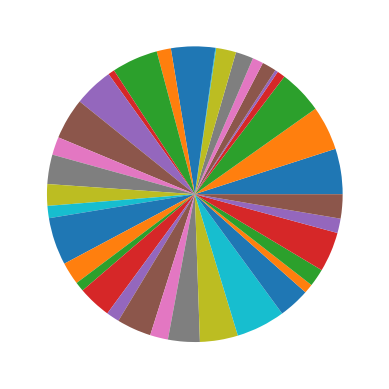

In [49]:
y = np.array(y_train)
plt.pie(y)
plt.show()

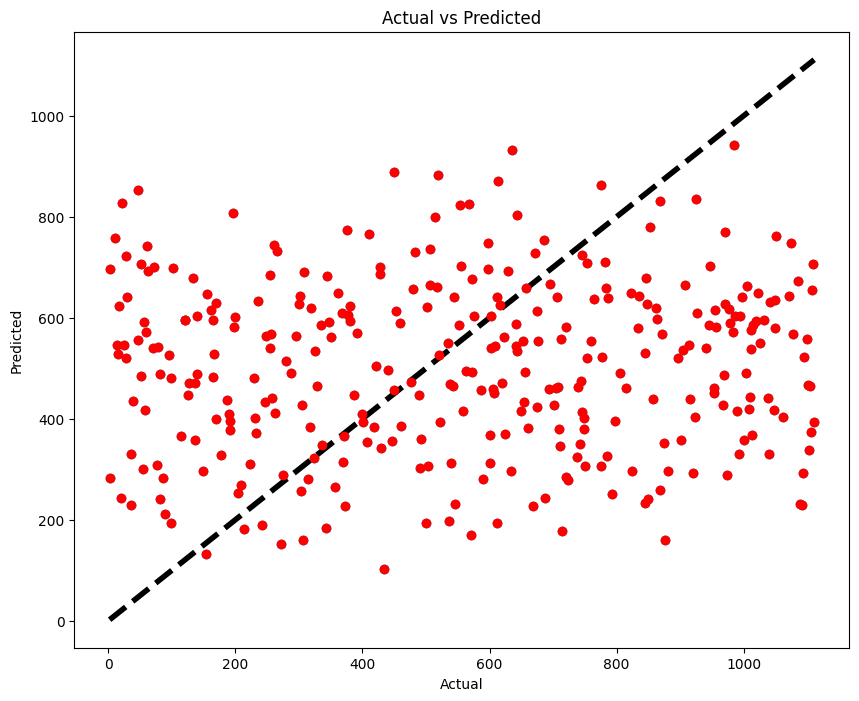

In [53]:
plot = plt.figure(figsize=(10, 8))
plot = plt.scatter(y_test, y_predict)
plot = plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plot  = plt.plot(y_test, y_predict, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

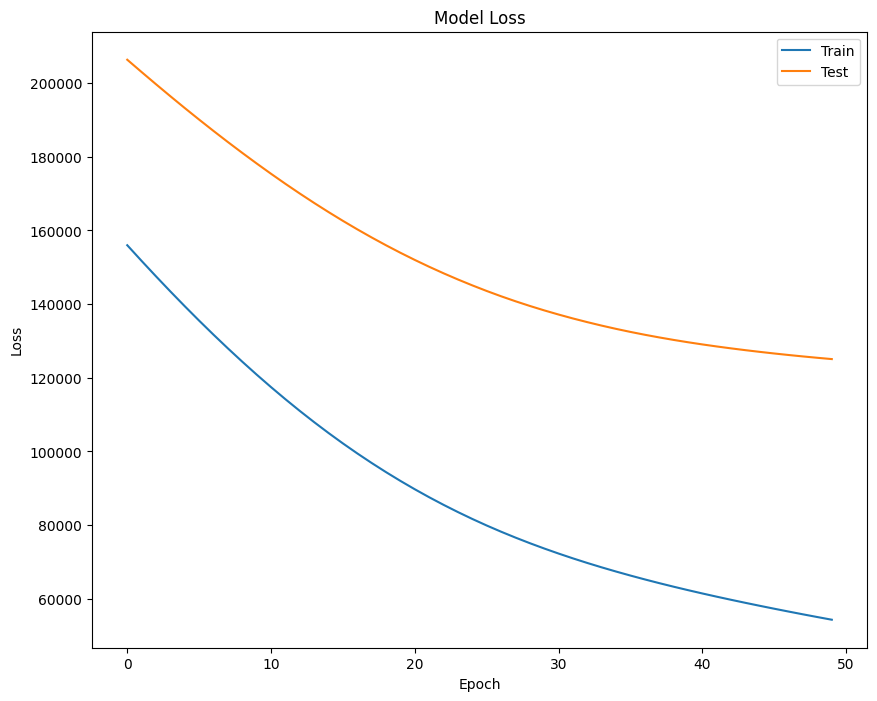

In [55]:
plot = plt.figure(figsize=(10, 8))
plot = plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()